# # Breast Cancer
 ---
 
 ### Objetivo 
El objetivo del problema se basa en clasificar si una célula es o no cancerígena en base a 10 atributos de la misma. 


In [68]:
#Importamos las librerías a utilizar
import numpy as np
import pandas as pd

In [69]:
ds=pd.read_csv("../data/breast-cancer-wisconsin.data")

#Revisamos cuantas instancia tenemos
print("Training data instances count:\t",ds.shape[0])

Training data instances count:	 698


In [70]:
#Revisamos las primeras diez instancias del nuestro dataset
ds.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


Como podemos ver nuestro dataset no tiene los encabezados, para saber los encabezados que debemos agregar, debemos leer la documentación adjunta a los datos.

In [71]:
#Estos segun la documentación del Dataset son los headers que debemos utilizar
headers=['id', 'clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']

#agregamos los headers al dataset
ds.columns=headers

#chequeamos que se hayan agregado correctamente 
ds.head()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [72]:
#Ahora vamos a revisar los tipo de datos de nuestro dataset
ds.dtypes

id                              int64
clump_thickness                 int64
uniformity_of_cell_size         int64
uniformity_of_cell_shape        int64
marginal_adhesion               int64
single_epithelial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
class                           int64
dtype: object

## Missing Values
---

In [73]:
#para el problema, la columna con los identificadores (id) es irrrelevante por lo que
#vamos a eliminarla del dataset 
ds=ds.drop(['id'] , axis=1)

#Chequeamos que efectivamente hayamos eliminado la columna
ds.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [74]:
#Creamos una funcion para imprimir ls diferentes valores que toman nuestras columnas
def unique_value(dataset):
    for column in dataset:
        print( "\n#### %s ####" % dataset[column].name)
        print(dataset[column].unique())

##        
unique_value(ds)


#### clump_thickness ####
[ 5  3  6  4  8  1  2  7 10  9]

#### uniformity_of_cell_size ####
[ 4  1  8 10  2  3  7  5  6  9]

#### uniformity_of_cell_shape ####
[ 4  1  8 10  2  3  5  6  7  9]

#### marginal_adhesion ####
[ 5  1  3  8 10  4  6  2  9  7]

#### single_epithelial_cell_size ####
[ 7  2  3  1  6  4  5  8 10  9]

#### bare_nuclei ####
['10' '2' '4' '1' '3' '9' '7' '?' '5' '8' '6']

#### bland_chromatin ####
[ 3  9  1  2  4  5  7  8  6 10]

#### normal_nucleoli ####
[ 2  1  7  4  5  3 10  6  9  8]

#### mitoses ####
[ 1  5  4  2  3  7 10  8  6]

#### class ####
[2 4]


Como podemos ver todo nuestros atributos son numéricos a excepción del atributo **bare_nuclei**, además vemos que en este atributo tenemos atributos faltantes marcado con el carácter **"?"**, como nuestro dataset es pequeño no estamos en condiciones de eliminar ninguna instancia por lo que vamos a imputar valores.

In [75]:
#reemplazamos los valores "?" con el un NaN de numpy, para luego contar los mismos
ds=ds.replace('?',value=np.nan)
ds.isna().sum()

clump_thickness                 0
uniformity_of_cell_size         0
uniformity_of_cell_shape        0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

Como podemos ver tenemos 16 instancias cuyo atributo **"bare_nuclei"** no tiene valor.

In [76]:
from sklearn.impute import SimpleImputer

#Creamos nuestro objeto encargado de imputar los valores,
#se va a utilizar como valor de imputación el valor promedio de la columna
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#Ajustamos nuestro objeto a columna la cual vamis a imputar los valores
ds_cleaning=pd.DataFrame(imputer.fit_transform(ds))

#le agregamos los heades al nuevo dataset
ds_cleaning.columns=headers[1:]

#Verificamos el nuevo dataset
ds_cleaning.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
1,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
2,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
3,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
4,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0


In [77]:
#volvemos a chequear que no hayan quedado datos faltantes
ds_cleaning=ds_cleaning.replace('?',value=np.nan)
ds_cleaning.isna().sum()

clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [78]:
#Ahora imprimimos los diferentes que valores de nuestro dataset con los valores 
#que imputamos.
unique_value(ds_cleaning)


#### clump_thickness ####
[ 5.  3.  6.  4.  8.  1.  2.  7. 10.  9.]

#### uniformity_of_cell_size ####
[ 4.  1.  8. 10.  2.  3.  7.  5.  6.  9.]

#### uniformity_of_cell_shape ####
[ 4.  1.  8. 10.  2.  3.  5.  6.  7.  9.]

#### marginal_adhesion ####
[ 5.  1.  3.  8. 10.  4.  6.  2.  9.  7.]

#### single_epithelial_cell_size ####
[ 7.  2.  3.  1.  6.  4.  5.  8. 10.  9.]

#### bare_nuclei ####
[10.         2.         4.         1.         3.         9.
  7.         3.5483871  5.         8.         6.       ]

#### bland_chromatin ####
[ 3.  9.  1.  2.  4.  5.  7.  8.  6. 10.]

#### normal_nucleoli ####
[ 2.  1.  7.  4.  5.  3. 10.  6.  9.  8.]

#### mitoses ####
[ 1.  5.  4.  2.  3.  7. 10.  8.  6.]

#### class ####
[2. 4.]


# Outliers
---

 Vamos a ver la correlación entre los atributos y graficarla para ello utilizaremos la matriz de correlación y para graficarla utilizaremos la librería **Seaborn**

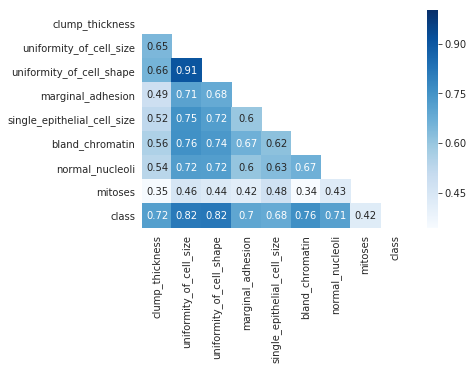

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

#Creamos una función para imprimir la matriz de correlacion.
def printCorrelationMatrix(dataset):
    correlation=ds.corr()
    mask = np.zeros_like(correlation)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(correlation, mask=mask,cmap="Blues",annot=True)
        
printCorrelationMatrix(ds_cleaning)

Como podemos ver **uniformity_of_cell_size** y **uniformity_of_cell_shape** estan altamente correlacionados por lo que debemos eliminar unos de los dos, en este caso eliminaremos 

In [80]:
ds_cleaning=ds_cleaning.drop(['uniformity_of_cell_size'] , axis=1)
ds_cleaning.head()

,clump_thickness,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
1,3.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
2,6.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
3,4.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
4,8.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0


Ahora haremos los diagramas de Caja para cada uno de los atributos en busca de outliers.

In [81]:
def printBoxplot(dataset):
    for column in dataset.columns:
        print("\n####### "+str(column)+" #######")
        sns.boxplot(dataset[column])
        plt.show()


####### clump_thickness #######


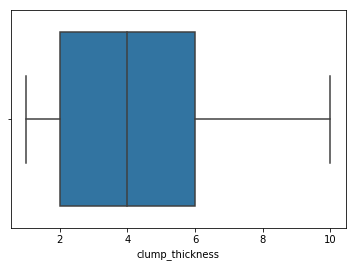


####### uniformity_of_cell_shape #######


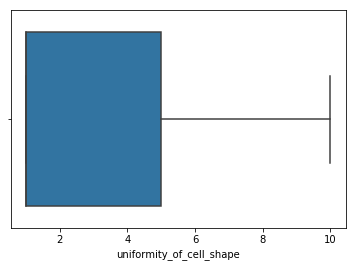


####### marginal_adhesion #######


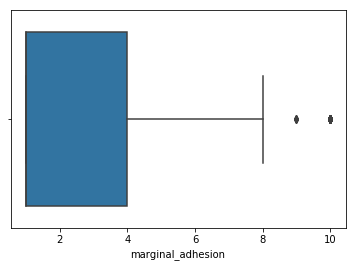


####### single_epithelial_cell_size #######


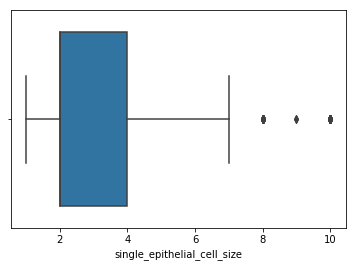


####### bare_nuclei #######


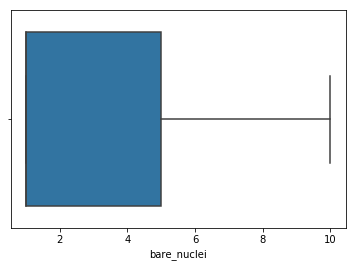


####### bland_chromatin #######


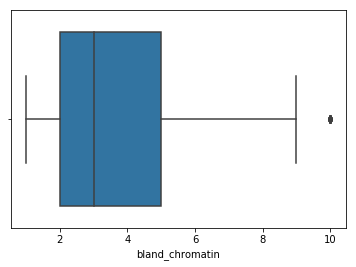


####### normal_nucleoli #######


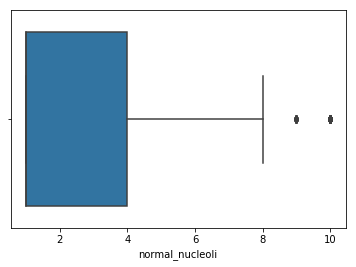


####### mitoses #######


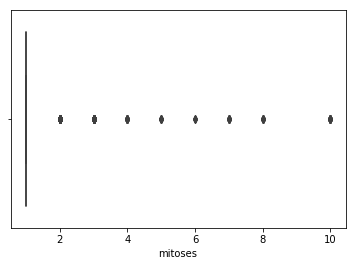

In [82]:
#Imprimimos los diagramas de caja sin tener en cuanta la variable objetivo
printBoxplot(ds_cleaning.drop(columns=['class'],axis=1))

In [83]:
ds_cleaning.quantile([0.25,0.5,0.75,0.95])

,clump_thickness,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0.25,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
0.50,4.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
0.75,6.0,5.0,4.0,4.0,5.0,5.0,4.0,1.0,4.0
0.95,10.0,10.0,10.0,8.0,10.0,8.0,10.0,5.0,4.0


Ahora vamos a reemplazar los valores de las clases para este problema el valor 2 significa que la célula es benigna, 4 que es maligna. En este caso vamos a establecer cómo la célula maligna en 1 y la célula benigna en 0.

In [84]:
#Hacemos el reemplazo 
ds_cleaning['class'].replace([2.0, 4.0], [0, 1], inplace=True)

#verificamos que uno y cero sean los únicos valores que tenemos en nuestro atributo 'class'
ds_cleaning['class'].unique()

array([0., 1.])

# Normalizacion

In [85]:
#Importo el Normalizador de SKLearn
from sklearn.preprocessing import Normalizer

#Quito la variable de predicción
X= np.array(ds_cleaning.drop(['class'],1))

#Ajusto nuestro normalizador a 
#nuestros datos y luego aplicando la transformación
transformer = Normalizer().fit(X)
X=transformer.transform(X)

#Verificamos la Normalización
print(X)

[[0.3304093  0.26432744 0.3304093  ... 0.19824558 0.13216372 0.06608186]
 [0.54772256 0.18257419 0.18257419 ... 0.54772256 0.18257419 0.18257419]
 [0.44112877 0.5881717  0.07352146 ... 0.22056439 0.51465024 0.07352146]
 ...
 [0.26352314 0.52704628 0.15811388 ... 0.42163702 0.52704628 0.10540926]
 [0.26375219 0.39562828 0.26375219 ... 0.65938047 0.39562828 0.06593805]
 [0.24665057 0.49330113 0.30831321 ... 0.61662642 0.24665057 0.06166264]]


# Entrenamiento y Evaluación de nuestro modelo

In [86]:
from sklearn import neighbors
from sklearn import model_selection

#Me quedo con la variable de predicción
Y = np.array(ds_cleaning['class'])

#Ajusto el tamaño de los datos para test
validation_size = 0.30

#Utilizo una semilla para poder reproducir el split
seed = 2018

#Hago un split para validar el modelo
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size=validation_size, random_state=seed)

#Defino el KFold
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#Defino el modelo de KNN
model = neighbors.KNeighborsClassifier(n_neighbors=2)

#Obtengo los resultados del entrenamiento 
results = model_selection.cross_val_score(model, X_train,Y_train, cv=kfold, scoring='accuracy')
print("#### Resultado Training ####\n")
print("Media: %f" % (results.mean()))
print("Desvio Estandar: %f" % (results.std()))

#### Resultado Training ####

Media: 0.858588
Desvio Estandar: 0.026603


# Validación del Modelo

In [87]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Vamos a probar con diferentes valores de k y registrar los scores
k = range(2, 26)
scores = []
for n in k:
    #Creo el modelo
    model = neighbors.KNeighborsClassifier(n_neighbors=n)
    
    #Lo ajusto a los datos de entrenamiento
    model.fit(X_train, Y_train)
    
    #Hago las preciiones sbre los datos de Validacion
    predictions = model.predict(X_validation)
    
    #Agregó el scoring a un array para luego hacer una gráfica
    accuracy=accuracy_score(Y_validation, predictions)
    scores.append(accuracy)
    print("\n-------------------------------------------------------")
    print("\n##### K= %s #####" % n)
    print("\nAccuracy: %s\n" % accuracy)
    print(classification_report(Y_validation, predictions))


-------------------------------------------------------

##### K= 2 #####

Accuracy: 0.8714285714285714

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       144
         1.0       0.95      0.62      0.75        66

   micro avg       0.87      0.87      0.87       210
   macro avg       0.90      0.80      0.83       210
weighted avg       0.88      0.87      0.86       210


-------------------------------------------------------

##### K= 3 #####

Accuracy: 0.9095238095238095

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       144
         1.0       0.90      0.80      0.85        66

   micro avg       0.91      0.91      0.91       210
   macro avg       0.91      0.88      0.89       210
weighted avg       0.91      0.91      0.91       210


-------------------------------------------------------

##### K= 4 #####

Accuracy: 0.8952380952380953

              precision    r


-------------------------------------------------------

##### K= 25 #####

Accuracy: 0.8809523809523809

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       144
         1.0       0.79      0.85      0.82        66

   micro avg       0.88      0.88      0.88       210
   macro avg       0.86      0.87      0.86       210
weighted avg       0.88      0.88      0.88       210



# Data Visualization

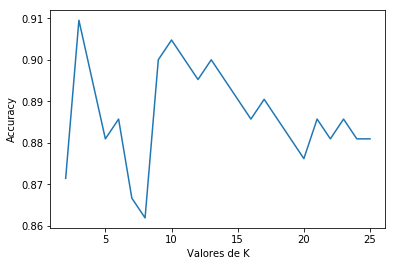

In [88]:
plt.xlabel('Valores de K');
plt.ylabel('Accuracy');
sns.lineplot(x=k,y=scores)
plt.show()